In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.stats import ttest_rel, ttest_ind
import numpy as np

rc('text', usetex=False);
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

rc('font', **font);

In [5]:
def p_to_stars(p):
    """map p-values to stars to display on graphs"""
    if p > 0.05:
        return 'n.s.';
    elif p > 0.01:
        return '*';
    elif p > 0.005:
        return '**';
    else:
        return '***';

In [6]:
def my_boxplot(df, ylabel, column_names=['Control', 'Experimental'], colors=['blue', 'darkorange'], scatter=True, ttest=False, scatter_spread_factor=1):
    fig, ax = plt.subplots(1,1,figsize=[4,8])
    dct = df.boxplot(ax=ax, whis='range', column=column_names, return_type='dict', patch_artist=True, widths=0.5)
    ax.set_ylabel(ylabel);
    ax.grid(False)
    ax.set_xticklabels([(col_name + "\nN={0}".format(df[col_name].dropna().count())) for col_name in column_names])

    for key, val in dct.items():
        for i in val:
            i.set_color('k')
    for box, col in zip(dct['boxes'], colors):
        box.set_facecolor(col)
    #     box.set_alpha(0.5)
    # FOR NOW, ONLY T-TEST BETWEEN TWO CONDITIONS
    if ttest and len(column_names) > 1:
        p = ttest_ind(df[column_names[0]].dropna(), df[column_names[1]].dropna()).pvalue;
        print(p)
        start_ylims = ax.get_ylim();
        start_plot_height = ax.get_ylim()[1] - ax.get_ylim()[0];
        height_per_comparison = 0.1 * (start_ylims[1] - start_ylims[0]);
        ax.set_ylim(start_ylims[0], start_ylims[1] +  height_per_comparison);
        lx = ax.get_xticks()[0];
        rx = ax.get_xticks()[1];
        mid = lx/2 + rx/2;
        lry = start_ylims[1] + 0.5 * height_per_comparison;
        h = height_per_comparison/4;

        barx = [lx, lx, rx, rx];
        bary = [(lry-h), lry, lry, (lry-h)];
        ax.plot(barx, bary, c='black');
        ax.text(mid, lry + h/2, p_to_stars(p));  
    if scatter:
        sigmas = [np.std((df[col_name].dropna())) for col_name in column_names];
        xs = [];
        ys = []; 
        for col_name in column_names:
            for x in list(1 + np.ones_like(df[col_name].dropna()) * column_names.index(col_name)):
                xs.append(x);
            for y in list(df[col_name].dropna()):
                ys.append(y);
        ecolors = [colors[int(x)-1] for x in xs]
        ss = [scatter_spread_factor*0.1/(sigmas[int(x)-1]+1) for x in xs]

        xs = np.random.normal(loc=xs, scale=ss)
        ax.scatter(xs,ys, zorder=10, marker='o', color=ecolors, edgecolors='k')
    return ax;


In [7]:
df = pd.read_csv("C:/Users/Doug/Desktop/plot3.csv")
ax = my_boxplot(df, 
           u'Timing of cephalic furrow cleft compared to MD2 (s)', 
           scatter=True, 
           ttest=False, 
           colors=['blue'], 
           column_names=['Control'], 
           scatter_spread_factor=30)
ax.set_ylim((-775, 0));

FileNotFoundError: File b'C:/Users/Doug/Desktop/plot3.csv' does not exist

In [ ]:
df4 = pd.read_csv("C:/Users/Doug/Desktop/plot4.csv")
my_boxplot(df4, 
           u'Time difference in descent between\n outside and inside of ROI (min)', 
           scatter=True, 
           ttest=False)



0.0004265312286412659


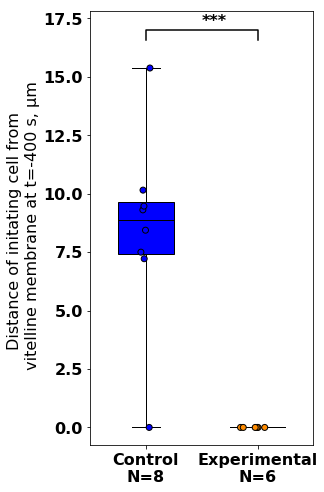

In [207]:
df2 = pd.read_csv("C:/Users/Doug/Desktop/plot2.csv")
my_boxplot(df2, 
           u'Distance of initating cell from \n vitelline membrane at t=-400 s, \u00B5m', 
           scatter=True, 
           ttest=True)
